In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import ast
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_json('ETLJson.json')

In [6]:
df['release_date']=pd.to_datetime(df['release_date'], errors= 'coerce', format= '%Y/%m/%d').dt.date
df['release_date']=pd.to_datetime(df['release_date'], errors= 'coerce', format= '%Y/%m/%d')
df

,publisher,genres,app_name,url,release_date,Year,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,2018,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,no_info,no_info
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,Mostly Positive,no_info
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com,Mostly Positive,no_info
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,2017,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,no_info,no_info
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",0.00,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed,no_info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,2018,"[Action, Indie, Casual, Violent, Adventure]",1.69,http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games,2 user reviews,no_info
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,2018,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",no_info,no_info
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,2018,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,no_info,no_info
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,2018,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,no_info,no_info


Drop NAN's de la columna 'genres'

In [7]:
df.dropna(subset=['genres'], inplace=True)
#df

Tratamiento del conjunto de columnas release_date:

In [8]:
df.insert(loc=5, column='month', value=2) # la creación de esta columna puede ser necesaria para la realizacion del modelo.
df['month'] = df['release_date'].dt.strftime('%m')
df=df[df['Year'] >1900] #28852 Los Year = 1900 corresponden a valores nulos que fueron cambiados por la fecha 1900-01-01 en el archivo ETL.
df

,publisher,genres,app_name,url,release_date,month,Year,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,01,2018,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,no_info,no_info
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,01,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",0.00,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,643980,Secret Level SRL,Mostly Positive,no_info
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,07,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",0.00,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,False,670290,Poolians.com,Mostly Positive,no_info
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,12,2017,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,no_info,no_info
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,01,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",0.00,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed,no_info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,01,2018,"[Action, Indie, Casual, Violent, Adventure]",1.69,http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games,2 user reviews,no_info
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,01,2018,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",no_info,no_info
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,01,2018,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,no_info,no_info
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,01,2018,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,no_info,no_info


In [9]:
df=df[df['price'] >0] #28613 26057 Se toman valores mayores a cero para el modelo.

In [10]:
df['month']=df['month'].astype(int)
#juegos['release_date']=juegos['release_date'].astype('str')
#df

C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_23216\3666524161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['month'].astype(int)


Dropear elementos 'no info' de developer para tomarlo para el modelo? no porque hay mas de 10000 elementos distintos

In [30]:
#df=df.loc[df['developer']!='no_info'] #26057 25904



In [11]:
df.describe()

,month,Year,discount_price,price,id
count,26057.000000,26057.000000,26057.000000,26057.000000,2.605700e+04
mean,7.050965,2014.820317,0.021250,9.526271,4.380098e+05
std,3.389129,3.315576,0.481749,16.253941,1.864213e+05
min,1.000000,1983.000000,0.000000,0.490000,0.000000e+00
25%,4.000000,2014.000000,0.000000,2.990000,3.133600e+05
50%,7.000000,2016.000000,0.000000,4.990000,4.340680e+05
75%,10.000000,2017.000000,0.000000,9.990000,5.850900e+05
max,12.000000,2021.000000,31.490000,995.000000,2.028850e+06


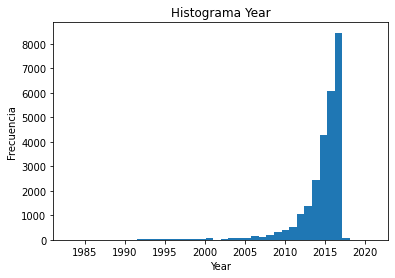

In [12]:
plt.hist(df['Year'], bins=40)
plt.xlabel('Year')
plt.ylabel('Frecuencia')
plt.title('Histograma Year')
plt.show()

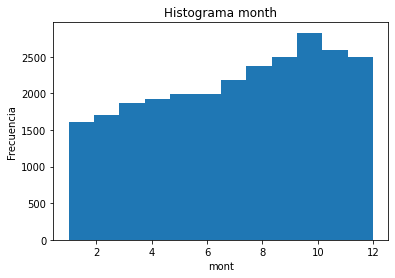

In [13]:
plt.hist(df['month'], bins=12)
plt.xlabel('mont')
plt.ylabel('Frecuencia')
plt.title('Histograma month')
plt.show()

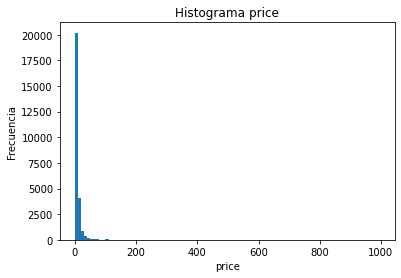

In [14]:
plt.hist(df['price'], bins=100)
plt.xlabel('price')
plt.ylabel('Frecuencia')
plt.title('Histograma price')
plt.show()

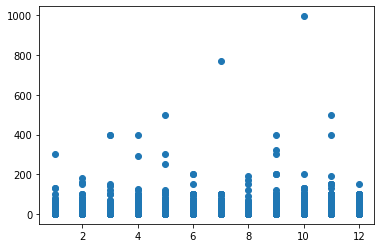

In [15]:
plt.scatter(x=df['month'],y=df['price'])

In [16]:
df.loc[df['price']>400].count()

publisher         4
genres            4
app_name          4
url               4
release_date      4
month             4
Year              4
tags              4
discount_price    4
reviews_url       4
specs             4
price             4
early_access      4
id                4
developer         4
sentiment         4
metascore         4
dtype: int64

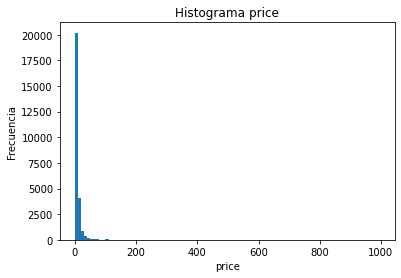

In [37]:
plt.hist(df['price'], bins=100)
plt.xlabel('price')
plt.ylabel('Frecuencia')
plt.title('Histograma price')
plt.show()

In [38]:
df.loc[df['price']>100].count()

publisher         52
genres            52
app_name          52
url               52
release_date      52
month             52
Year              52
tags              52
discount_price    52
reviews_url       52
specs             35
price             52
early_access      52
id                52
developer         52
sentiment         52
metascore         52
dtype: int64

Se eliminan valores outliers tomando encuenta el rango intercuantil, 
ref: https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/

In [40]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
df = df[(df['price'] >= lb) & (df['price'] <= ub)]


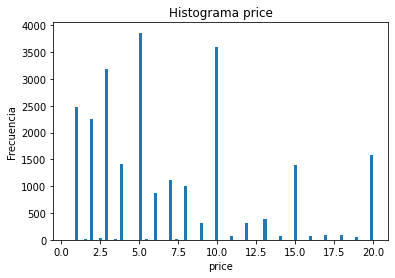

In [41]:
plt.hist(df['price'], bins=100)
plt.xlabel('price')
plt.ylabel('Frecuencia')
plt.title('Histograma price')
plt.show()

In [42]:
df.describe()

,month,Year,discount_price,price,id
count,24309.000000,24309.000000,24309.000000,24309.000000,2.430900e+04
mean,7.031511,2014.769756,0.016558,6.976410,4.373400e+05
std,3.392656,3.396246,0.332757,5.274819,1.872042e+05
min,1.000000,1983.000000,0.000000,0.490000,0.000000e+00
25%,4.000000,2014.000000,0.000000,2.990000,3.124400e+05
50%,7.000000,2016.000000,0.000000,4.990000,4.346100e+05
75%,10.000000,2017.000000,0.000000,9.990000,5.854300e+05
max,12.000000,2021.000000,14.990000,20.000000,2.028850e+06


In [44]:
lista=df['developer'].to_list()

len(lista)


24309

In [45]:
x=df['developer'].to_list()
B=[]
from itertools import islice
def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

dic = dict(Counter(x))
dic = dict(sorted(dic.items(), reverse= True, key=lambda x:x[1])) # aqui es un diccionario
dic10 = take(10, dic.items()) #aqui es una lista
#lis=list(dic.keys())
#lis10=lis[0:10]
dic10=dict(dic10)
type(dic10)
dic10
#df10=pd.DataFrame.from_dict(dic10, columns= 'index')
#df10
dic10
a=list(dic10)
#b=list()
b = list(dic10.values())


#dic = dict(Counter(dev))
#dic = dict(sorted(dic.items(), reverse= True, key=lambda x:x[1])) # aqui es un diccionario
dic10

{'Ubisoft - San Francisco': 1255,
 'SmiteWorks USA, LLC': 730,
 'Dovetail Games': 227,
 'KOEI TECMO GAMES CO., LTD.': 172,
 'Paradox Development Studio': 144,
 'no_info': 142,
 'Ronimo Games': 122,
 'Capcom': 119,
 'Stainless Games': 95,
 'Musopia': 90}

In [46]:
df

,publisher,genres,app_name,url,release_date,month,Year,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,1,2018,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,no_info,no_info
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,12,2017,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,no_info,no_info
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,1,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",0.00,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed,no_info
6,no_info,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,2018-01-04,1,2018,"[Free to Play, Indie, Simulation, Sports]",0.00,http://steamcommunity.com/app/774276/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,774276,Poppermost Productions,no_info,no_info
7,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,http://store.steampowered.com/app/774277/SNOW_...,2018-01-04,1,2018,"[Free to Play, Indie, Simulation, Sports]",0.00,http://steamcommunity.com/app/774277/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",18.99,False,774277,Poppermost Productions,no_info,no_info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,1,2018,"[Action, Indie, Casual, Violent, Adventure]",1.69,http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games,2 user reviews,no_info
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,1,2018,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",no_info,no_info
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,1,2018,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,no_info,no_info
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,1,2018,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,no_info,no_info


In [47]:
dfgenresdumm=df['genres'].str.join(',').str.get_dummies(sep=',')
dfgenresdumm=dfgenresdumm[['Indie','Action', 'Casual',
 'Adventure',
 'Strategy',
 'Simulation',
 'RPG',
 'Early Access',
 'Sports',
 'Racing']]


In [48]:
dfred=df[['month', 'Year']]
#dfred=df[['Year']]

X=pd.concat([dfred,dfgenresdumm], axis=1)
#X=dfgenresdumm
X.describe()
Y=df[['price']]




In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

In [59]:

X_train, X_test, y_train, y_test = train_test_split(X,Y,  test_size=0.3, random_state=42)

In [61]:
bosque= RandomForestRegressor(n_estimators=150, max_features=13)
bosque.fit(X_train, y_train)
y_pred=bosque.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared= False)
R2=r2_score(y_test, y_pred)
print('En el modelo random forest, el error cuadrático medio es :', rmse , ', y el R2 es: ',  R2)


C:\Users\Nahuel Elias\AppData\Local\Temp\ipykernel_16116\4039135334.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bosque.fit(X_train, y_train)


En el modelo random forest, el error cuadrático medio es : 5.049208017539477 , y el R2 es:  0.11727826090832238


In [56]:
poli2=PolynomialFeatures(degree=3, include_bias=False)

Xtr=poli2.fit_transform(X_train)

lr = LinearRegression()

lr.fit(Xtr,y_train)

Xtrtest=poli2.fit_transform(X_test)

ypred=lr.predict(Xtrtest)

R2= r2_score(y_test,ypred)
rmse = mean_squared_error(y_test, y_pred, squared= False)

print('En el modelo de regresion polinomica, el error cuadrático medio es :', rmse , ', y el R2 es: ',  R2)

En el modelo de regresion polinomica, el error cuadrático medio es : 5.045150070045909 , y el R2 es:  0.14619932586848883
